In [11]:
#!pip install sckit-learn
#!pip install pandas
#!pip install matplotlib
#!pip install mglearn

# import sys
# !{sys.executable} -m pip install mglearn

In [12]:
import sys
sys.version 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

import warnings
warnings.filterwarnings('ignore')

#그래프 한글깨짐오류
plt.rcParams['font.family'] = 'Malgun Gothic'

#그래프 마이너스 깨짐 오류
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


## 1. MinMaxScaler

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [14]:
#scale (train data)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [15]:
#scale (test data)
# scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값:\n {}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


## 2. Wrong scaled data

In [16]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

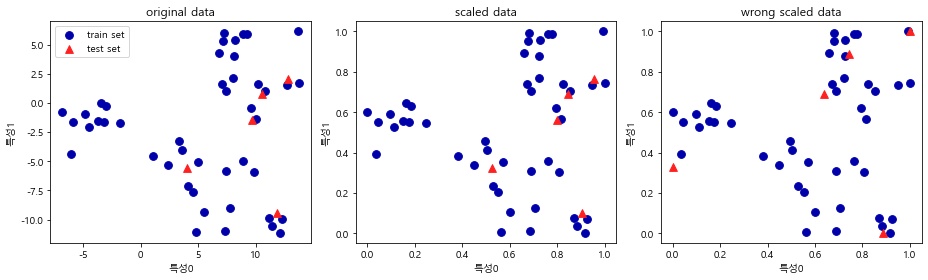

In [17]:
#split data
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

#원본데이터 그래프
fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], 
                label="train set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:,1], marker='^', c=mglearn.cm2.colors[1],
                label="test set", s=60)
axes[0].legend(loc="upper left")
axes[0].set_title("original data")

#스케일데이터 그래프
#MinMaxScaler
sacler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0],
                label="train set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
               c=mglearn.cm2.colors[1], label="test set", s=60)
axes[1].set_title("scaled data")

#test set이 잘못 조정된 스케일데이터 그래프
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0],
               label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker='^',
               c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("wrong scaled data")

for ax in axes:
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
fig.tight_layout()

*스케일링 간편하게 하기

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)
print("방법1:\n",X_scaled[:5])
print("방법2:\n",X_scaled_d[:5])

방법1:
 [[ 1.26451381  0.72293084]
 [-1.90399871  0.10468641]
 [ 0.48772902  1.45351073]
 [ 1.18981441 -1.49536946]
 [ 0.77494109 -0.71058389]]
방법2:
 [[ 1.26451381  0.72293084]
 [-1.90399871  0.10468641]
 [ 0.48772902  1.45351073]
 [ 1.18981441 -1.49536946]
 [ 0.77494109 -0.71058389]]


*스케일링 효과 확인

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)
svm = SVC(gamma='auto', C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 세트 정확도: 0.63
스케일 조정된 테스트 세트의 정확도: 0.97


## 3. PCA
1. pca 객체 생성
2. fit 매서드 호출해 데이터 호출시키고 차원 축소
3. transfrom 매서드를 호출해 데이터를 호출시키고 차원 축소

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

#scaling
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [22]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, '2nd pc')

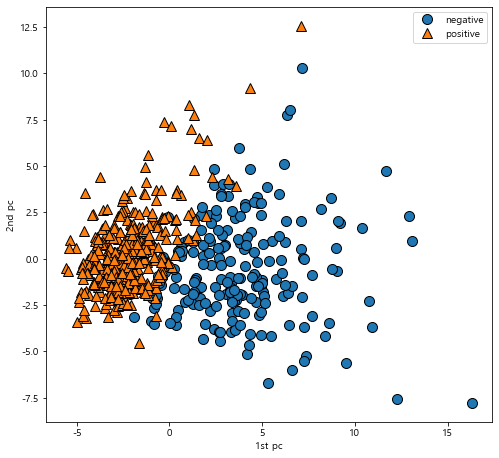

In [23]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["negative", "positive"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st pc")
plt.ylabel("2nd pc")

- components_ : 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬되어 있다. 열은 원본 데이터의 특성에 대응하는 값이다.

In [24]:
print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


*주성분 2개 히트맵 시각화

Text(0, 0.5, 'pc')

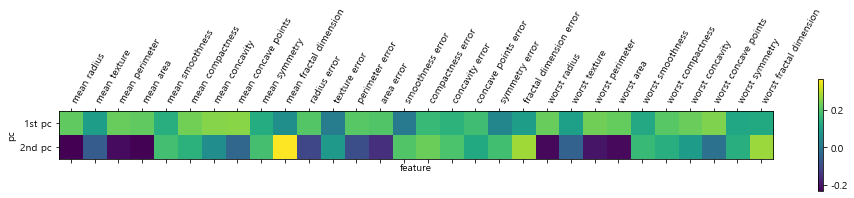

In [25]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["1st pc","2nd pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("pc")

*고유얼굴(eigenface) 특성 추출
- 특성 추출 : 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾기 위해 하는 작업. 이미지에서는 특성 추출이 도움이 될 수 있다.

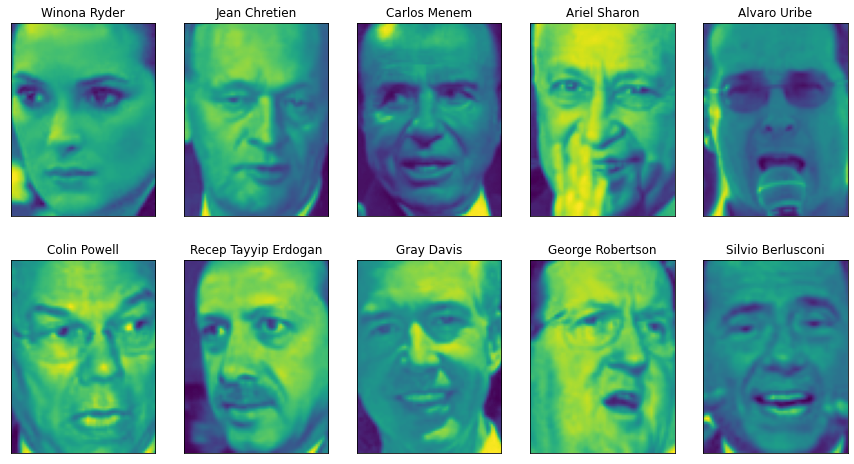

In [3]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig,axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
plt.show()

In [5]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스의 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스의 개수: 62


0.234496
X_train_pca.shape : (1547, 100)
0.306202


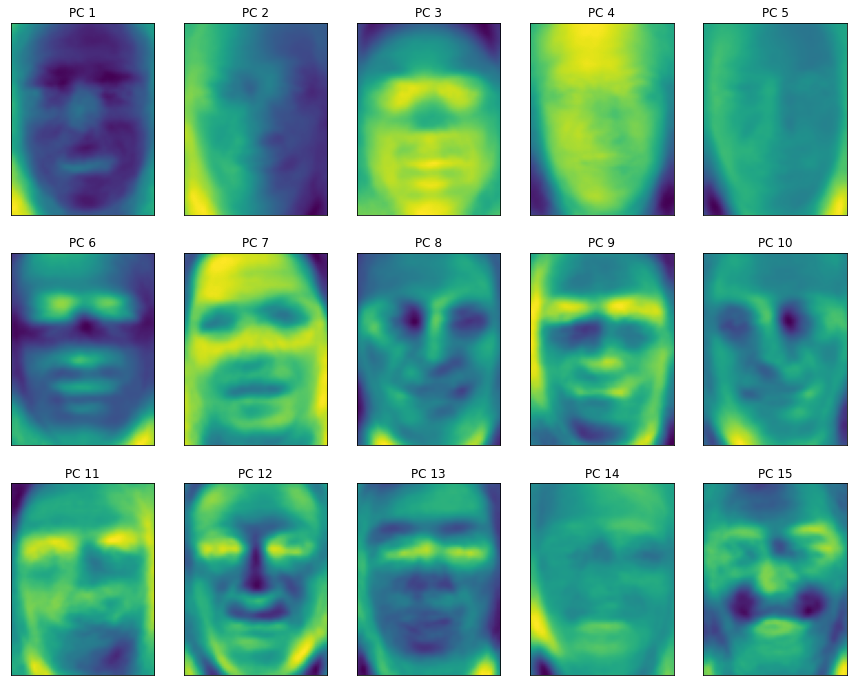

In [13]:
import numpy as np
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people /255.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("{:2f}".format(knn.score(X_test, y_test))) #최근접 이웃수를 늘려도 비슷한 결과임

from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape : {}".format(X_train_pca.shape))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("{:2f}".format(knn.score(X_test_pca, y_test)))

fig,axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})

for i , (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("PC {}".format(i+1))
    
plt.show()

## 4. 밀도 기반 군집 분석(DBSCAN)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [30]:
X = pd.read_csv("E:/문지은/빅데이터청년캠퍼스(을지대)/7_10_비지도학습_이론/credit card.csv")
X

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [31]:
#결측치
X = X.drop('CUST_ID', axis =1)
X.fillna(method = 'ffill', inplace = True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [32]:
#데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #scaling
X_normalized = normalize(X_scaled) #데이터가 가우스분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) #데이터 프레임 변환
pca = PCA(n_components = 2) #pca
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519098  0.544830
2  0.330633  0.268880
3 -0.481656 -0.097609
4 -0.563512 -0.482506


In [33]:
#DBSCAN
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal) #모델 생성 및 훈련
labels = db_default.labels_
colours = {} 
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
cvec = [colours[label] for label in labels]

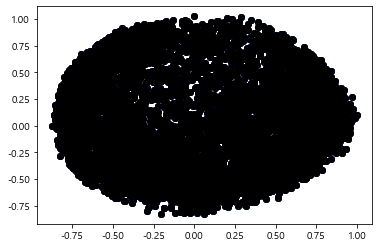

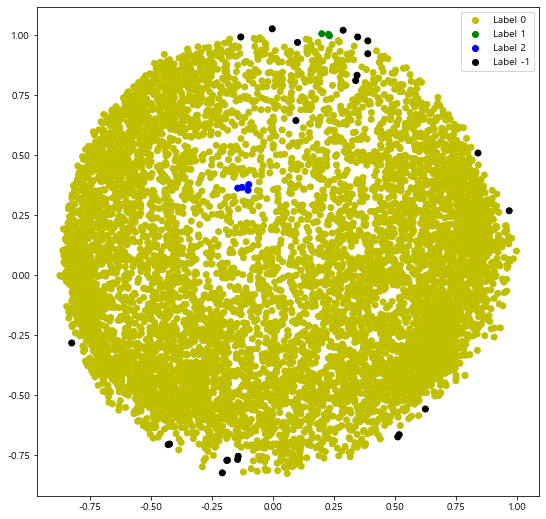

In [34]:
r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b'); 

k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k');
plt.figure(figsize=(9,9))

plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

In [35]:
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal) 
labels1 = db.labels_ 
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

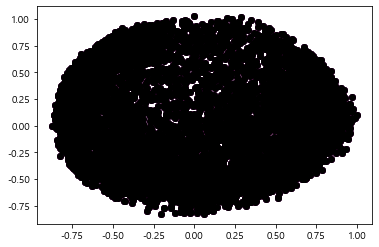

In [36]:
r = plt.scatter( X_principal['P1'], X_principal['P2'], 
marker='o', color=colors1[0]) 
g = plt.scatter( X_principal['P1'], X_principal['P2'], 
marker='o', color=colors1[1]) 
b = plt.scatter( X_principal['P1'], X_principal['P2'], 
marker='o', color=colors1[2]) 
c = plt.scatter( X_principal['P1'], X_principal['P2'], 
marker='o', color=colors1[3]) 
y = plt.scatter( X_principal['P1'], X_principal['P2'], 
marker='o', color=colors1[4]) 
m = plt.scatter( X_principal['P1'], X_principal['P2'], 
marker='o', color=colors1[5]) 
k = plt.scatter( X_principal['P1'], X_principal['P2'], 
marker='o', color=colors1[6])

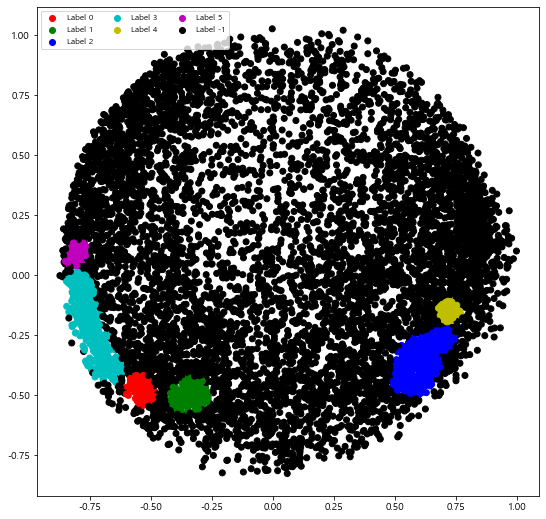

In [37]:
plt.figure(figsize=(9,9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 
            'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints=1, loc='upper left',ncol=3, fontsize=8) 
plt.show()

## 5. K-means

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = pd.read_csv("E:/문지은/빅데이터청년캠퍼스(을지대)/7_10_비지도학습_이론/sales data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [40]:
#명목형 데이터
categorical_features = ['Channel', 'Region']
#연속형 데이터
continuous_features = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

#명목형 데이터 원핫인코딩
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [41]:
#연속형 데이터 스케일링
mms = MinMaxScaler()
data_transformed = mms.fit_transform(data)

In [42]:
#적당한 k값 추출
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
Sum_of_squared_distances

[411.82878995921095,
 213.39898477020844,
 117.07252399254907,
 75.94845856513454,
 37.922437718162826,
 19.418928179725288,
 15.67916418107215,
 13.129100808295878,
 11.736772658017706,
 10.659848501049456,
 9.778697268640729,
 8.852508942613152,
 8.285773371554473,
 7.985013067048396]

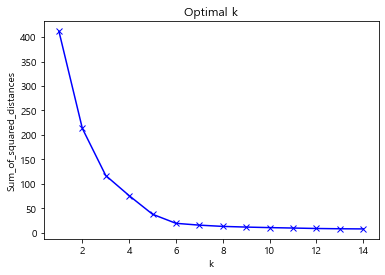

In [43]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
x=data
#데이터를 표준화 시켜준다.
x_normalized = MinMaxScaler().fit(x).transform(x) 
#중심을 랜덤하게 4개로 정한다.
kmeans = KMeans(n_clusters=4,random_state=0) 
#학습을 통해 군집을 생성한다.
kmeans.fit(x_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

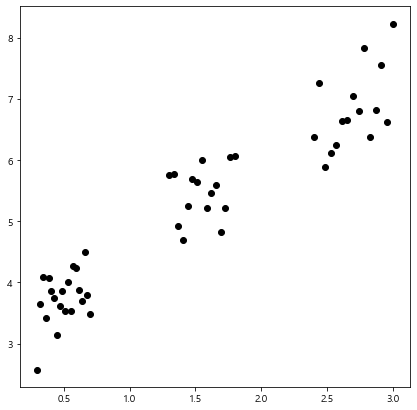

In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(100)
num_data = 50 
x11 = np.linspace(0.3,0.7,20)
x12 = np.linspace(1.3,1.8,15)
x13 = np.linspace(2.4,3,15)
x1 = np.concatenate((x11,x12,x13),axis=None)
error = np.random.normal(1,0.5,num_data)
x2 = 1.5*x1+2+error
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
plt.scatter(x1, x2, color='k')
plt.show()

In [46]:
def kmeans_clustering(X, n_clusters, init_center=None, max_iter=10, epsilon=1e-4, random_state=100): 
    # inititalize centeroids
    if init_center is None: 
        random.seed(random_state) 
        idx = random.sample(range(X.shape[0]), n_clusters) 
        center = X[idx,:]
    else: 
        center = init_center
    iteration = 1 
    labels_history = [] # label history 
    center_history = [] # centeroid history 
    while(iteration<=max_iter): 
        ## assign label 
        labels = [] 
        for i in range(X.shape[0]): 
            data = X[i, :] 
            labels.append(np.argmin([np.linalg.norm(data-x) for x in center])) 
        labels = np.array(labels) 
            ## update centeroids
        next_center = [] 
        for i in range(n_clusters): 
            target_idx = np.where(labels==i)[0] 
            center_val = np.mean(X[target_idx,:], axis=0) 
            next_center.append(center_val) 
        next_center = np.array(next_center) 
        
        if epsilon: 
            if np.linalg.norm(next_center-center) <= epsilon: 
                break 
                
        center = next_center
        labels_history.append(labels) 
        center_history.append(center) 
        iteration += 1 

    return (labels, iteration, labels_history, center_history)

In [47]:
X = np.stack([x1, x2], axis=1) 
init_center= np.array([[2,4],[1,5],[2.5,6]])
max_iter=50
epsilon=1e-10
random_state=101
n_clusters=3
results = kmeans_clustering(X, n_clusters, init_center, max_iter, epsilon=1e-4, random_state=100)
labels = results[0]

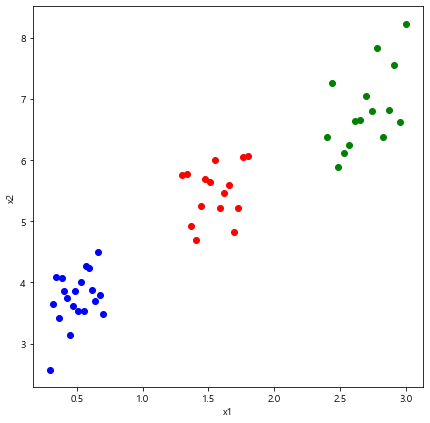

In [48]:
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
for i, label in enumerate(labels): 
    if label == 0: 
        color = 'blue' 
    elif label ==1: 
        color = 'red' 
    else: 
        color = 'green' 
    plt.scatter(X[i,0],X[i,1], color=color) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

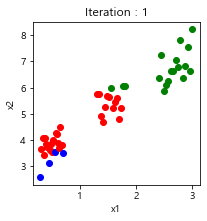

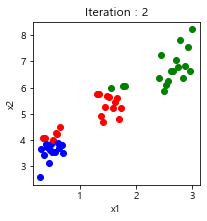

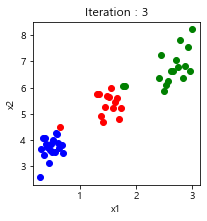

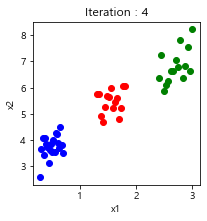

In [49]:
labels_history = results[2]
for j, labels in enumerate(labels_history): 
    fig = plt.figure(figsize=(3,3)) 
    fig.set_facecolor('white') 
    for i, label in enumerate(labels): 
        if label == 0: 
            color = 'blue' 
        elif label ==1: 
            color = 'red' 
        else: 
            color = 'green' 
        plt.scatter(X[i,0],X[i,1], color=color) 
    plt.title(f'Iteration : {j+1}') 
    plt.xlabel('x1') 
    plt.ylabel('x2')
plt.show()

*skit-learn으로 군집화하기

In [50]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init=init_center)
kmeans.fit(X)
labels = kmeans.labels_

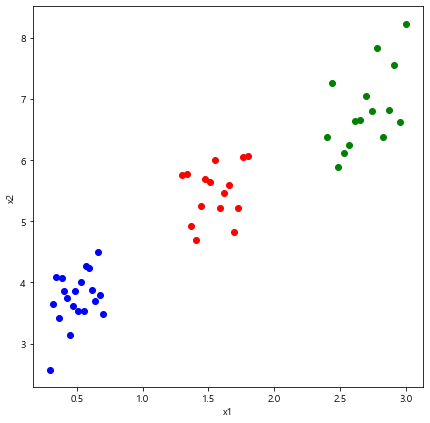

In [51]:
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
for i, label in enumerate(labels): 
    if label == 0: 
        color = 'blue' 
    elif label ==1: 
        color = 'red' 
    else: 
        color = 'green' 
    plt.scatter(X[i,0],X[i,1], color=color) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()